# WeatherPy

In [84]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn
import requests as req
from citipy import citipy
from random import *

In [85]:
#COULD NOT FIGURE OUT HOW TO CREATE RANDOM COORDINATES THAT DO NOT REPEAT
#Managed to create random coordinates however.

#Create a blank list where random coordinates would append to
coord_list = []

#Create function that creates x,y coordinates based on actual coordinate min and max
def rand_coord():
    return uniform(-90,90), uniform(-180, 180)

#Run function x times
coordinates = (rand_coord() for x in range(400)) #of total pairs

#Create for loop that grabs 
for point in coordinates:
    coord_list.append(point)

#Check results are coorect
print(coord_list)

[(-56.97727629737201, -111.95099963968438), (-33.04890199952311, 62.14278759649898), (66.57203670388745, 99.03427375470164), (68.81717310818513, 167.14475332558197), (40.2519527051231, 164.20715592004626), (-17.62351973454321, -113.38655270017172), (64.7233724694504, -159.33839353028577), (41.53081439943631, -153.4539796461578), (8.404217493824717, 63.18487847356624), (26.450650013562708, -4.579859884039564), (-26.698609920478866, -97.5546865891698), (-66.52112678719695, -128.35473210067423), (-86.13792010547485, 175.19829193469116), (50.517174854602956, -155.62059732640049), (-9.066364078502104, 21.908494784773183), (-45.05620515508001, 33.52743486665071), (-14.91743857488072, -31.150874904549653), (66.77918070819683, 2.284552769256152), (-13.266340541147315, -90.5942874507927), (-72.5719213556958, -67.32226837379542), (-20.70302044286653, -11.535966740213468), (-67.82588672553423, -135.79120875079556), (-13.379983301852647, -131.5497380349583), (13.656807236768358, 66.01878128669301)

In [87]:
cities = []
city_list = []
row_count = 0

for coordinate_pair in coord_list:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))

for city in cities:
    name = city.city_name.title()
    row_count += 1
    city_list.append(name)
    if row_count < 401: #maximum number of repetition. Should be changed to 500
        print("Random city #", row_count, name)
    else:
        continue


Random city # 1 Castro
Random city # 2 Saint-Philippe
Random city # 3 Tura
Random city # 4 Bilibino
Random city # 5 Severo-Kurilsk
Random city # 6 Rikitea
Random city # 7 Bethel
Random city # 8 Kodiak
Random city # 9 Kavaratti
Random city # 10 Taoudenni
Random city # 11 Pisco
Random city # 12 Rikitea
Random city # 13 Bluff
Random city # 14 Kodiak
Random city # 15 Lucapa
Random city # 16 Port Alfred
Random city # 17 Coruripe
Random city # 18 Raudeberg
Random city # 19 San Cristobal
Random city # 20 Ushuaia
Random city # 21 Jamestown
Random city # 22 Rikitea
Random city # 23 Atuona
Random city # 24 Kavaratti
Random city # 25 Coihaique
Random city # 26 Ancud
Random city # 27 North Bend
Random city # 28 Marrakesh
Random city # 29 Guerrero Negro
Random city # 30 Esperance
Random city # 31 Busselton
Random city # 32 Clyde River
Random city # 33 Ponta Do Sol
Random city # 34 Castro
Random city # 35 Hobart
Random city # 36 Rawson
Random city # 37 Tessalit
Random city # 38 North Bend
Random cit

In [88]:
city_df = pd.DataFrame(city_list)

city_df["latitude"]=""
city_df["temperature"]=""
city_df["humidity"]=""
city_df["cloudiness"]=""
city_df["wind_speed"]=""
city_df = city_df.rename(columns={0:"city_name"})

city_df.tail()

,city_name,latitude,temperature,humidity,cloudiness,wind_speed
395,Khatanga,,,,,
396,Biak,,,,,
397,Qaanaaq,,,,,
398,Yerbogachen,,,,,
399,Chokurdakh,,,,,


In [89]:
cities = []

for index, row in city_df.iterrows():
    cities = row["city_name"]
    query_url=  "http://api.openweathermap.org/data/2.5/weather?units=imperial&q=%s&appid=%s" % (cities.replace(" ","+"), api_key)
    weather = req.get(query_url).json()
    
    try:
        city_df.set_value(index, "latitude", weather["coord"]["lat"])
        city_df.set_value(index, "temperature", weather["main"]["temp"])
        city_df.set_value(index, "humidity", weather["main"]["humidity"])
        city_df.set_value(index, "cloudiness", weather["clouds"]["all"])
        city_df.set_value(index, "wind_speed", weather["wind"]["speed"])
        print("- ", end="")
                   
    except:
        continue
        
city_df

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

,city_name,latitude,temperature,humidity,cloudiness,wind_speed
0,Castro,-42.48,58.94,97,100,9.53
1,Saint-Philippe,45.36,-10.76,57,1,13.87
2,Tura,25.52,73.93,73,0,5.61
3,Bilibino,68.06,-33.58,59,8,2.37
4,Severo-Kurilsk,50.68,29.96,100,80,10.65
5,Rikitea,-23.12,77.35,100,92,14.79
6,Bethel,60.79,14,92,90,10.29
7,Kodiak,39.95,10.4,66,90,12.75
8,Kavaratti,10.57,82.48,100,0,5.61
9,Taoudenni,22.68,35.05,60,0,4.72


In [100]:
city_df['latitude'].replace('', np.nan, inplace=True)
city_df.dropna(subset=["city_name"], inplace=True)
city_df.dropna(subset=["latitude"], inplace=True)
city_df

,city_name,latitude,temperature,humidity,cloudiness,wind_speed
0,Castro,-42.48,58.94,97,100,9.53
1,Saint-Philippe,45.36,-10.76,57,1,13.87
2,Tura,25.52,73.93,73,0,5.61
3,Bilibino,68.06,-33.58,59,8,2.37
4,Severo-Kurilsk,50.68,29.96,100,80,10.65
5,Rikitea,-23.12,77.35,100,92,14.79
6,Bethel,60.79,14,92,90,10.29
7,Kodiak,39.95,10.4,66,90,12.75
8,Kavaratti,10.57,82.48,100,0,5.61
9,Taoudenni,22.68,35.05,60,0,4.72


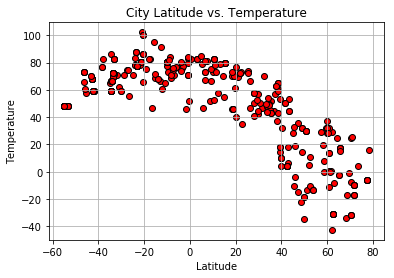

In [102]:
plt.scatter(city_df.latitude, city_df.temperature, marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

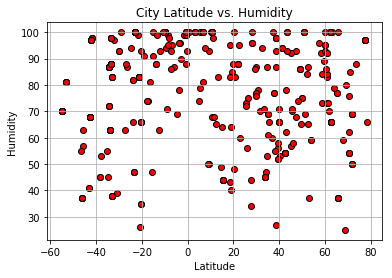

In [103]:
plt.scatter(city_df.latitude, city_df.humidity, marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

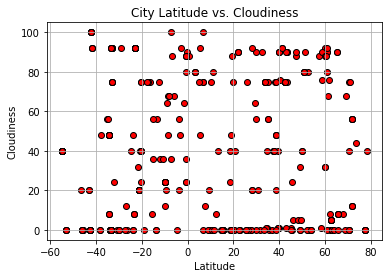

In [104]:
plt.scatter(city_df.latitude, city_df.cloudiness, marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show()

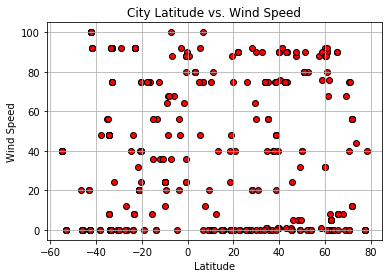

In [105]:
plt.scatter(city_df.latitude, city_df.cloudiness, marker="o", facecolors="red", edgecolors="black")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.show()